In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pylab import rcParams

from mlforecast import MLForecast

from sklearn.ensemble import RandomForestRegressor

from src.data.loaders import CommodityLoader
from src.utils.split_series import split_series
from src.evaluation.evaluation import MetricEvaluator

In [18]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#212946',
    'axes.facecolor': '#212946',
    'savefig.facecolor':'#212946',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 
}
plt.rcParams.update(dark_style)

In [19]:
df_brl = CommodityLoader.load_all_commodities(currency='BRL', preprocessing=True, monthly_aggregation='mean', limit_date=None)

ദ്ദി・ᴗ・)✧ acucar_santos carregado com sucesso
ദ്ദി・ᴗ・)✧ acucar_sp carregado com sucesso
ദ്ദി・ᴗ・)✧ algodao carregado com sucesso
ദ്ദി・ᴗ・)✧ arroz carregado com sucesso
ദ്ദി・ᴗ・)✧ cafe_arabica carregado com sucesso
ദ്ദി・ᴗ・)✧ cafe_robusta carregado com sucesso
ദ്ദി・ᴗ・)✧ milho carregado com sucesso
ദ്ദി・ᴗ・)✧ soja_parana carregado com sucesso
ദ്ദി・ᴗ・)✧ soja_paranagua carregado com sucesso
ദ്ദി・ᴗ・)✧ trigo_parana carregado com sucesso
ദ്ദി・ᴗ・)✧ trigo_rs carregado com sucesso


In [20]:
df_brl.head()

,ds,y,unique_id
0,2020-01-01,73.428636,ACUCAR_SANTOS
1,2020-02-01,81.636111,ACUCAR_SANTOS
2,2020-03-01,79.906364,ACUCAR_SANTOS
3,2020-04-01,77.113500,ACUCAR_SANTOS
4,2020-05-01,84.638500,ACUCAR_SANTOS


In [21]:
train, val, test = split_series(df_brl)

Splitted data into TRAIN with size 1605, VALIDATION with size 406 and TEST with size 868


In [22]:
model = RandomForestRegressor(
    n_estimators=5,
    min_samples_leaf=5,
    max_depth=5,
)

fcst = MLForecast(
    models={'rf': model},
    lags=[1, 2],
    freq='MS'
)

# params found here https://www.nature.com/articles/s41598-024-74503-4/tables/7

In [23]:
# start tunning here if needed eventually

In [24]:
full_train = pd.concat([train, val])

In [25]:
fcst.fit(full_train)

MLForecast(models=[rf], freq=MS, lag_features=['lag1', 'lag2'], date_features=[], num_threads=1)

In [26]:
# Rollout
forecasts = []
for i in range(len(test)):
    f_next = fcst.predict(h=1)
    forecasts.append(f_next)

    # add real value
    obs = test.iloc[[i]][['unique_id', 'ds', 'y']]
    fcst.update(obs)

In [27]:
forecasts_df = pd.concat(forecasts, ignore_index=True)

In [28]:
evaluator = MetricEvaluator()

In [29]:
results = evaluator.evaluate_multiple(
    forecasts_df=forecasts_df,    
    actual_df=test,                
    model_columns=['rf'],         
    groupby_column='unique_id'     
)

print(results)

         unique_id Model  n_observations        MAE      MAPE           MSE  \
0    ACUCAR_SANTOS    rf              20   8.641962  0.059409    118.059251   
1        ACUCAR_SP    rf             100   4.170468  0.036352     34.120225   
2          ALGODAO    rf             205  12.307151  0.035444    395.911224   
3            ARROZ    rf             277   3.189984  0.058642     17.373287   
4     CAFE_ARABICA    rf             381  58.526929  0.044184  48421.713596   
5     CAFE_ROBUSTA    rf             468  43.897685  0.088735  14925.584762   
6            MILHO    rf             543   0.770828  0.013599      3.874772   
7      SOJA_PARANA    rf             644   7.239778  0.096728     57.004701   
8   SOJA_PARANAGUA    rf             714   5.924636  0.066512     38.376597   
9     TRIGO_PARANA    rf             791  88.146402  0.078427  32570.060900   
10        TRIGO_RS    rf             868  46.356193  0.037522  21492.562546   

          RMSE        R2  
0    10.865507  0.047019

In [30]:
summary = evaluator.get_summary_stats(results)
print("\n=== Estatísticas Resumo ===")
print(summary)


=== Estatísticas Resumo ===
           MAE                                    MAPE                  \
          mean      std     min      max median   mean     std     min   
Model                                                                    
rf     25.3793  29.2023  0.7708  88.1464  8.642  0.056  0.0254  0.0136   

                              MSE                                            \
          max  median        mean         std     min         max    median   
Model                                                                         
rf     0.0967  0.0586  10734.0584  16801.5813  3.8748  48421.7136  118.0593   

          RMSE                                         R2                 \
          mean     std     min       max   median    mean     std    min   
Model                                                                      
rf     65.9801  83.778  1.9684  220.0493  10.8655  0.6717  0.3707  0.047   

                       
          max  median  
Mode

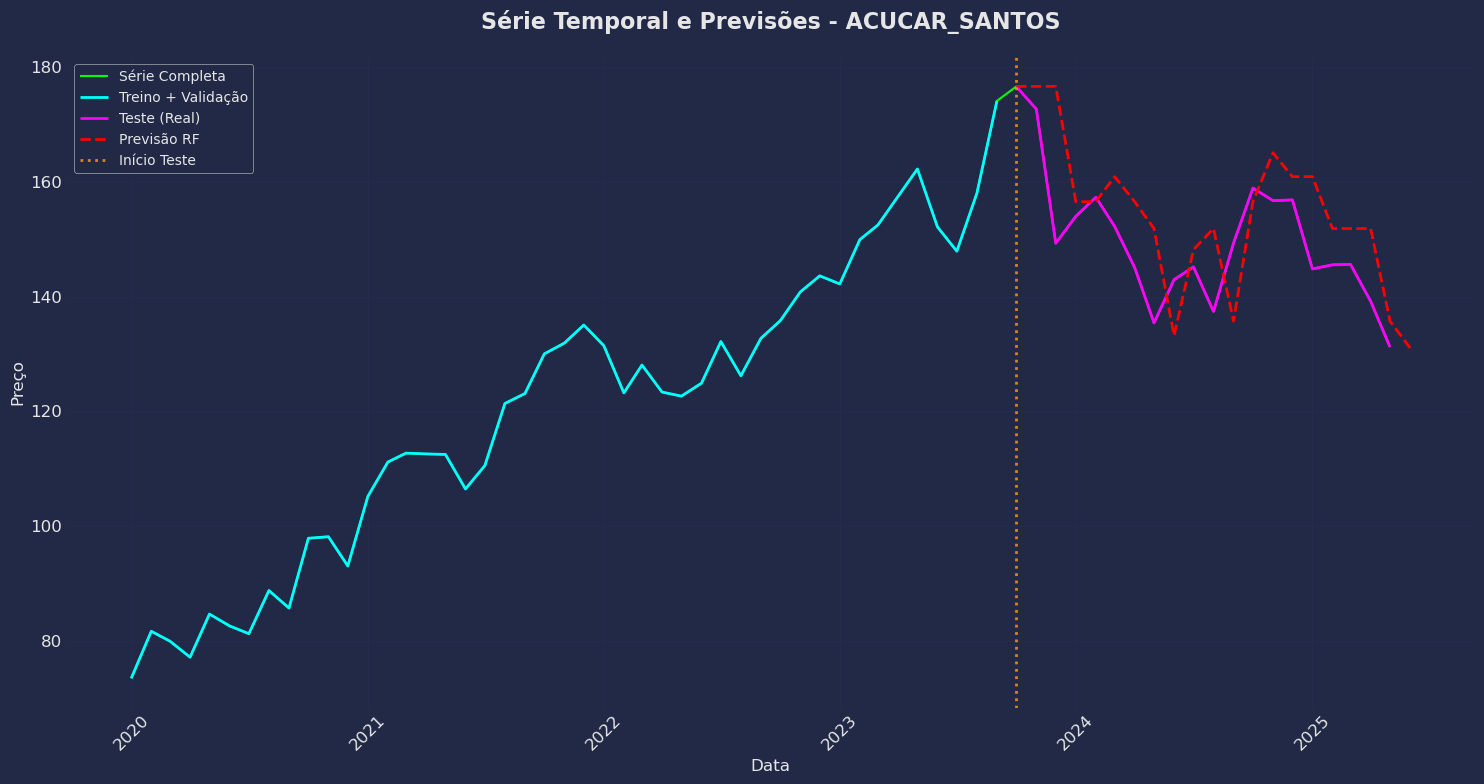

Gráfico exibido para: ACUCAR_SANTOS
--------------------------------------------------


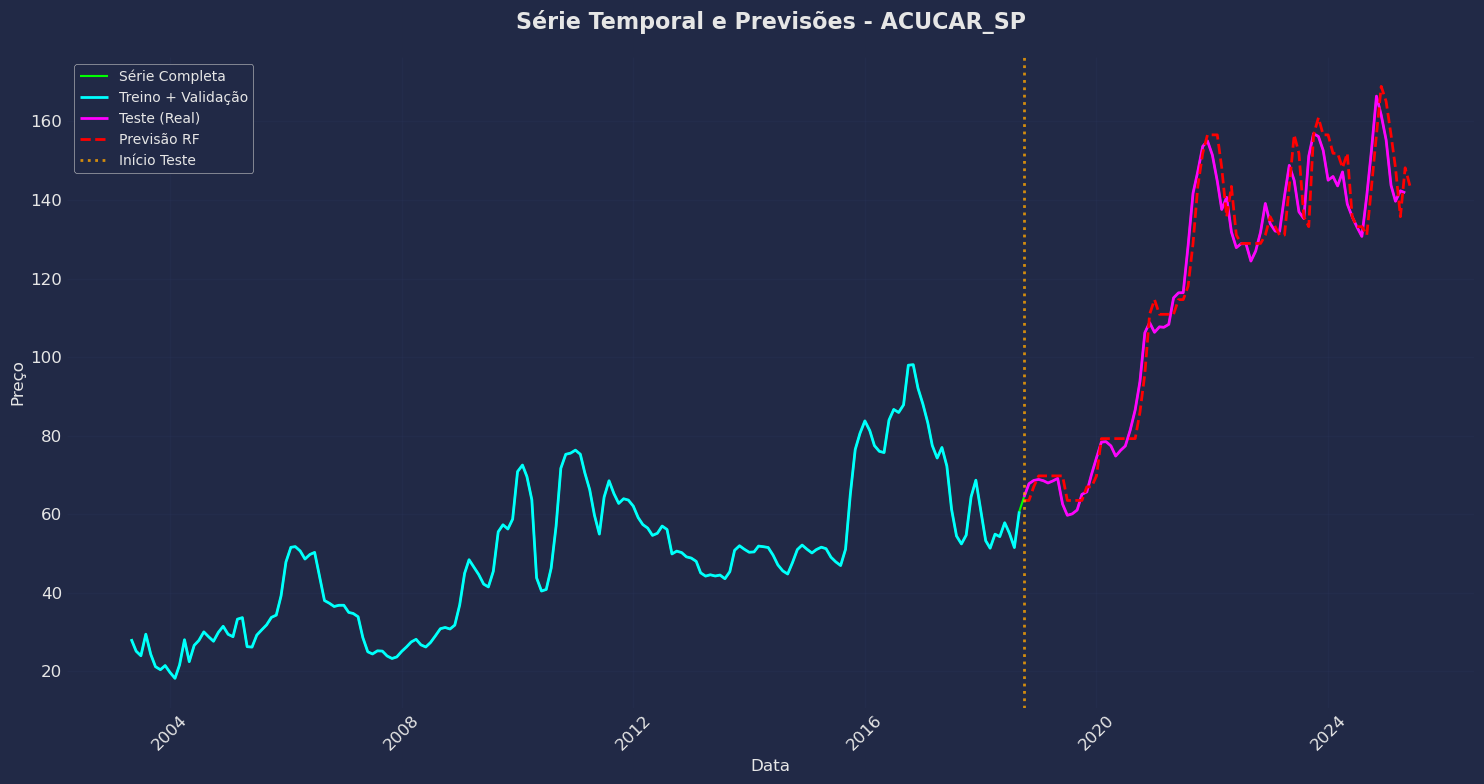

Gráfico exibido para: ACUCAR_SP
--------------------------------------------------


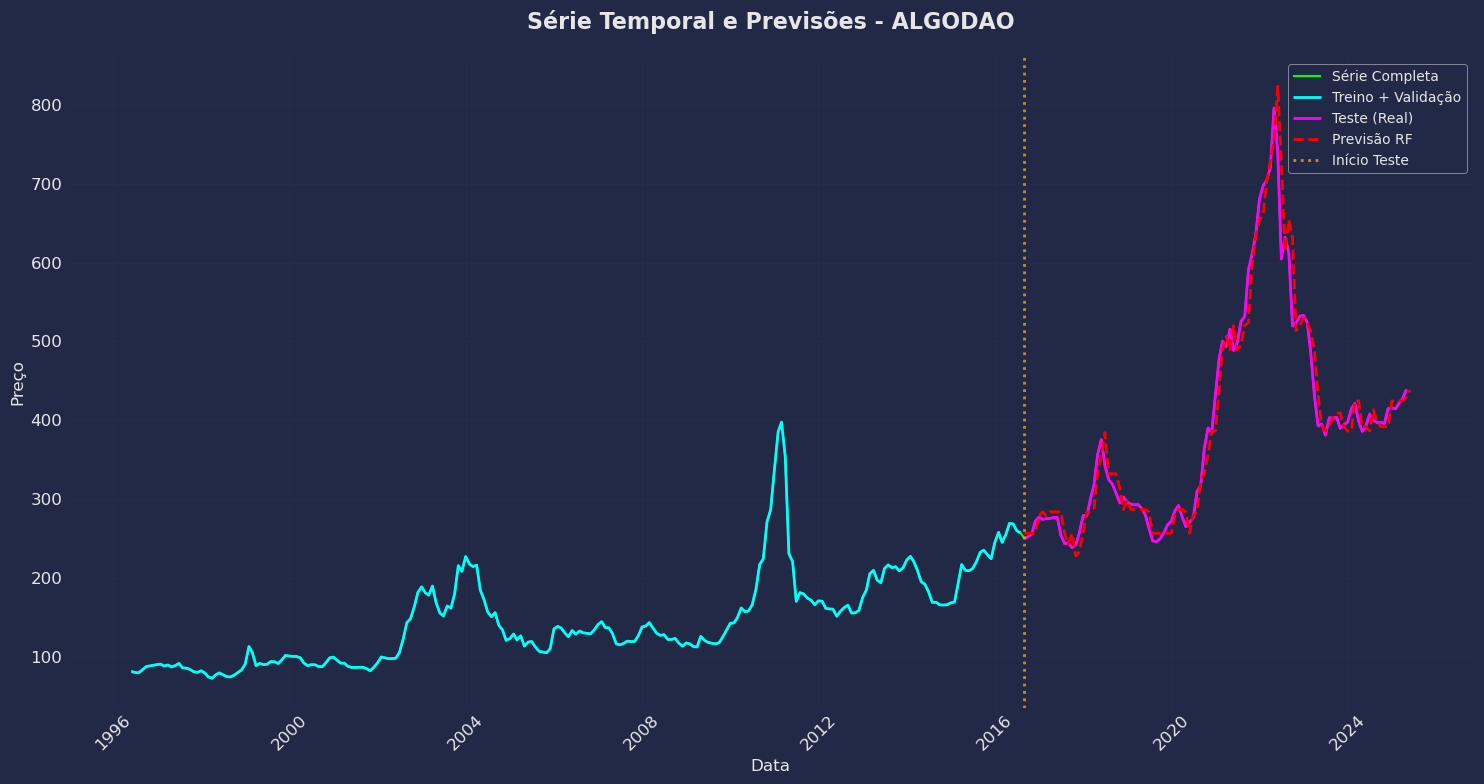

Gráfico exibido para: ALGODAO
--------------------------------------------------


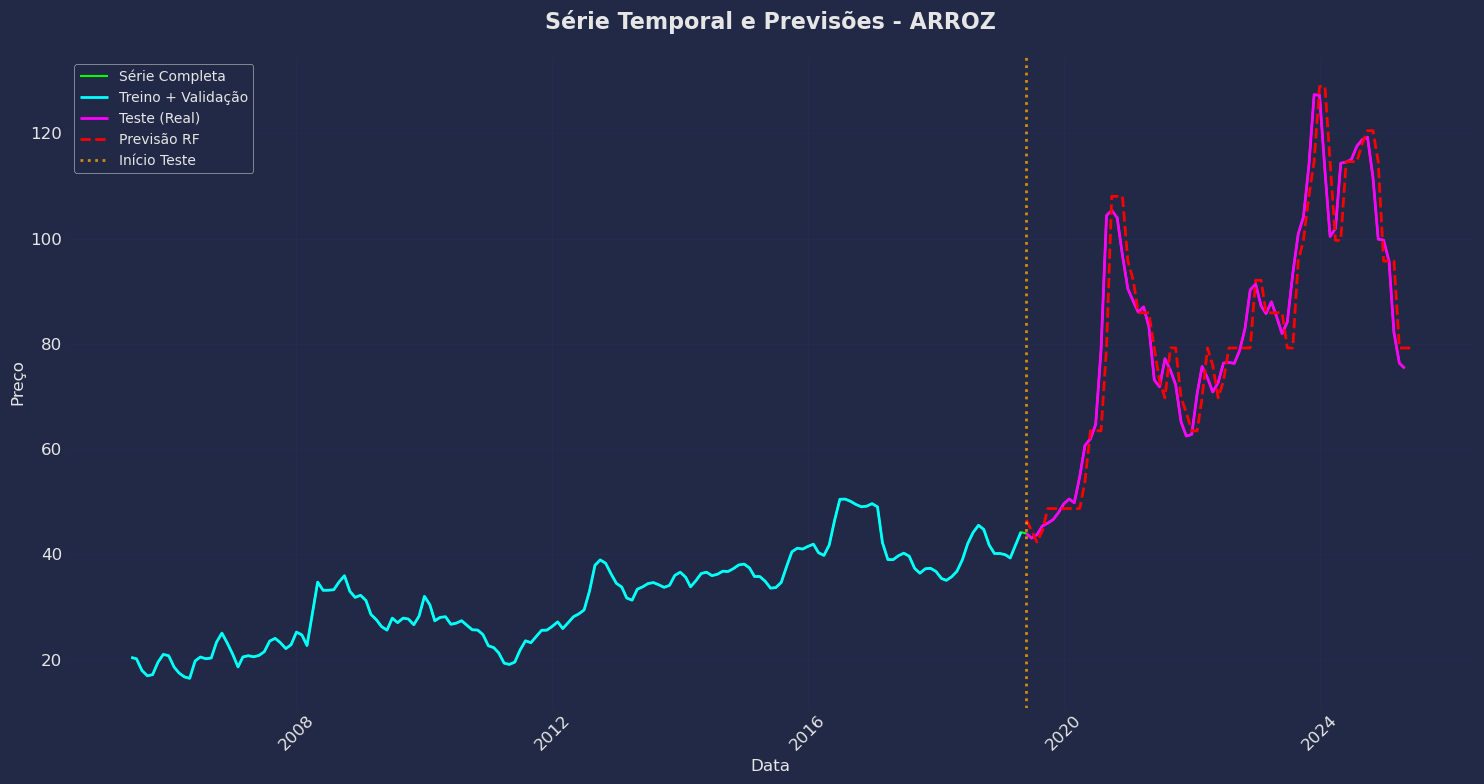

Gráfico exibido para: ARROZ
--------------------------------------------------


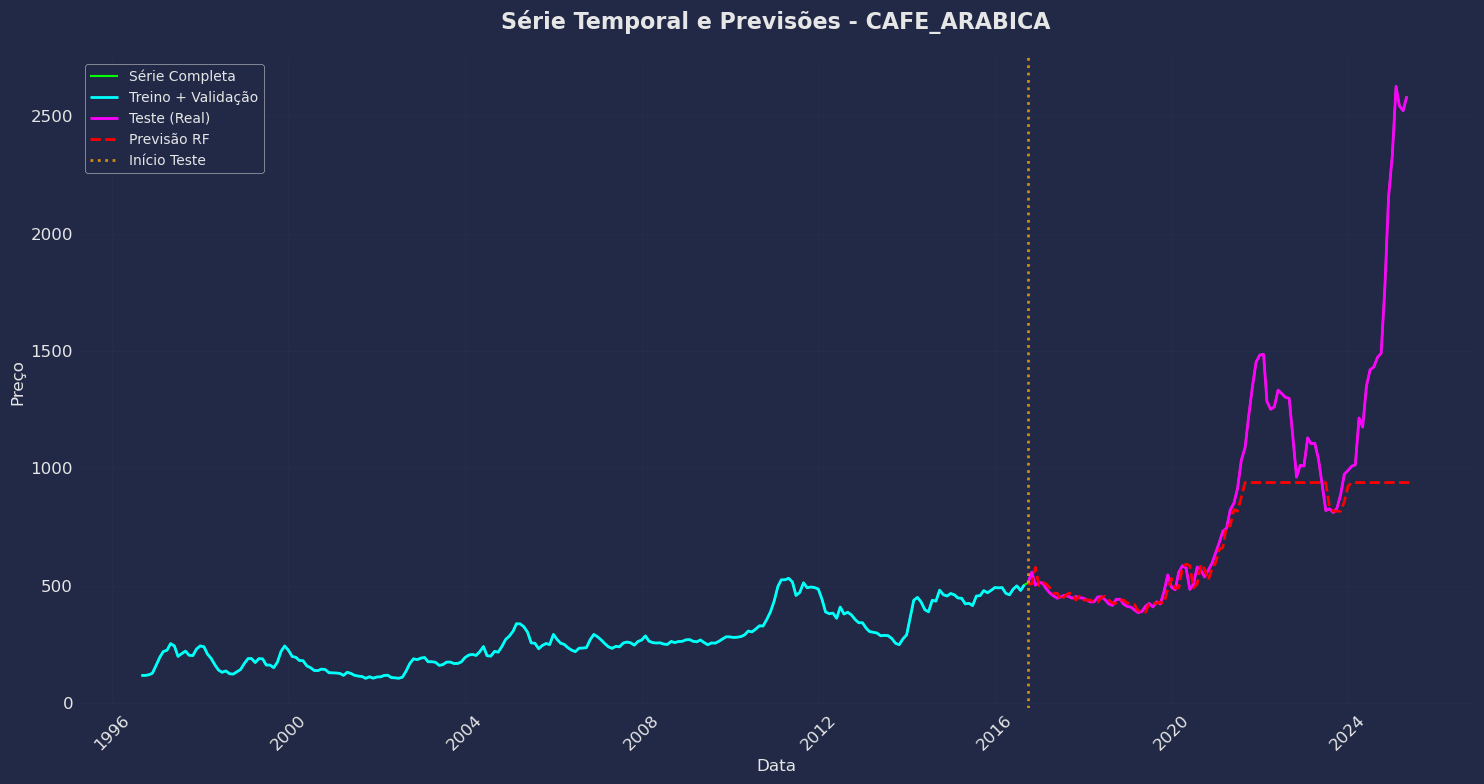

Gráfico exibido para: CAFE_ARABICA
--------------------------------------------------


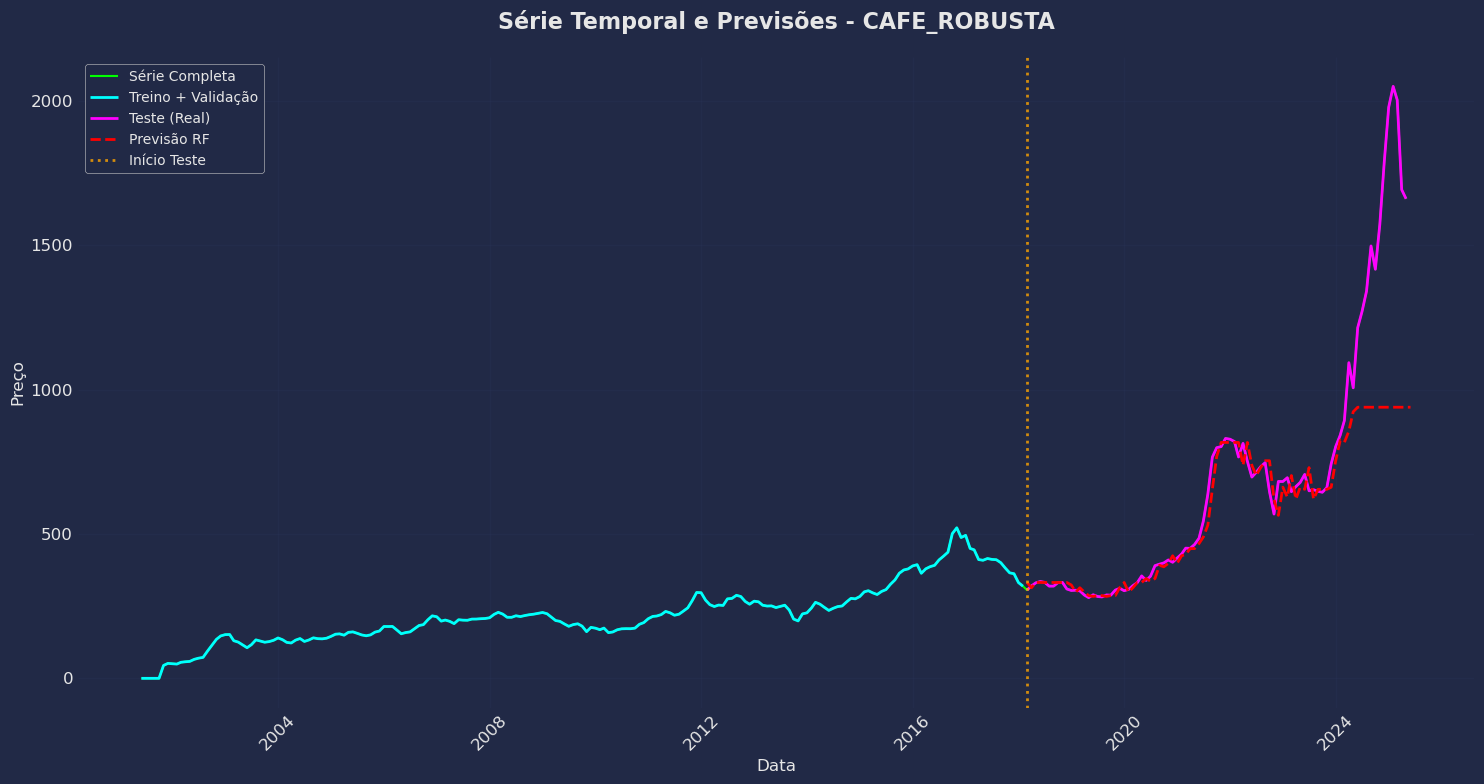

Gráfico exibido para: CAFE_ROBUSTA
--------------------------------------------------


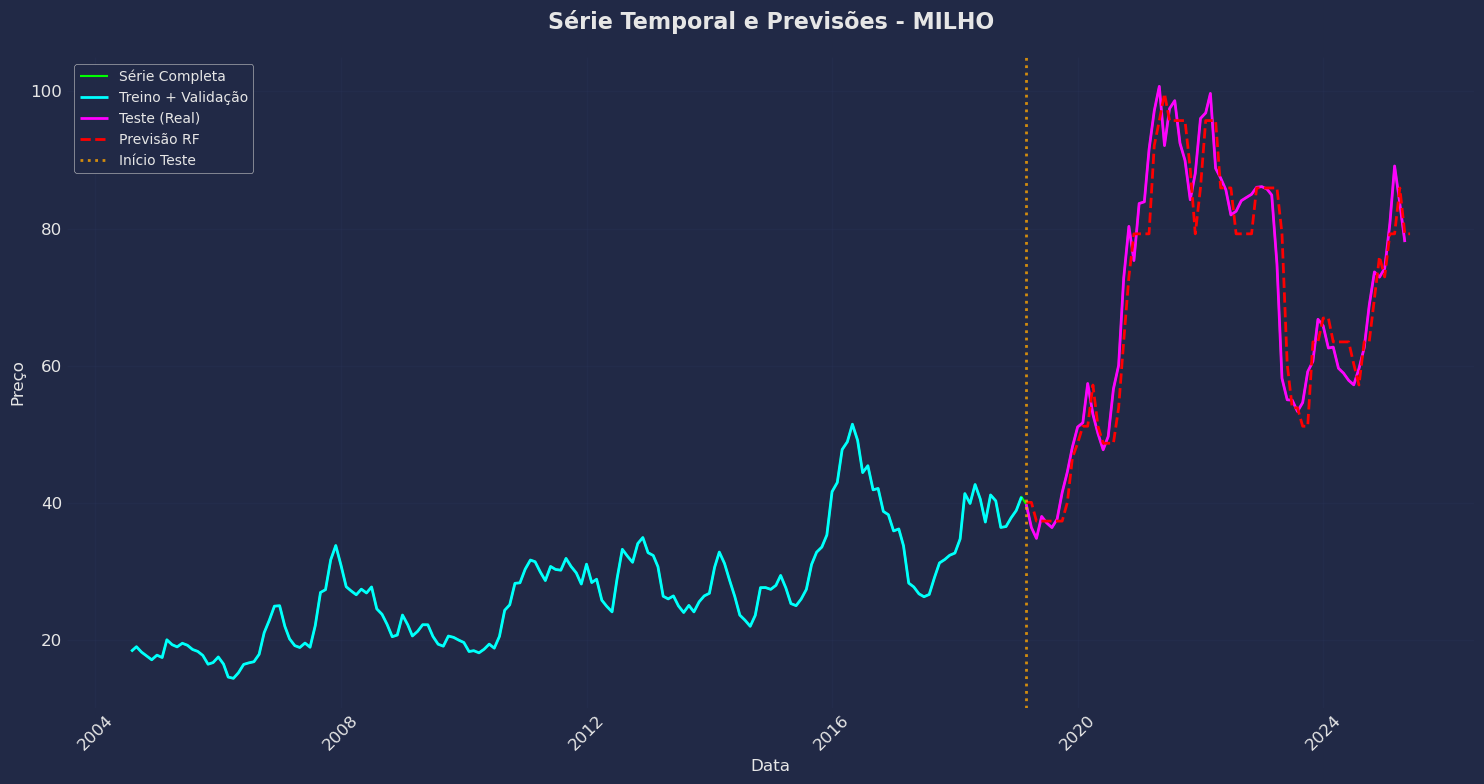

Gráfico exibido para: MILHO
--------------------------------------------------


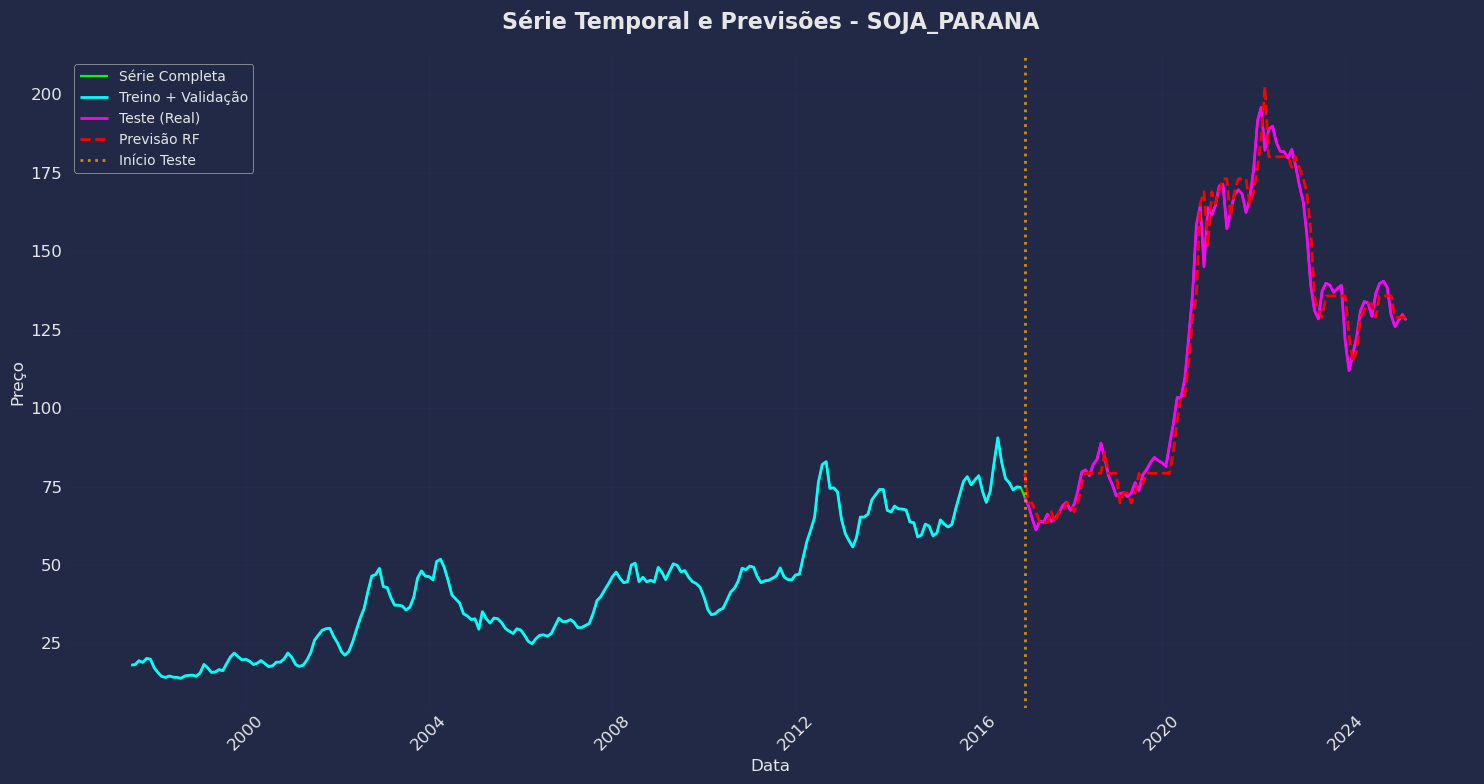

Gráfico exibido para: SOJA_PARANA
--------------------------------------------------


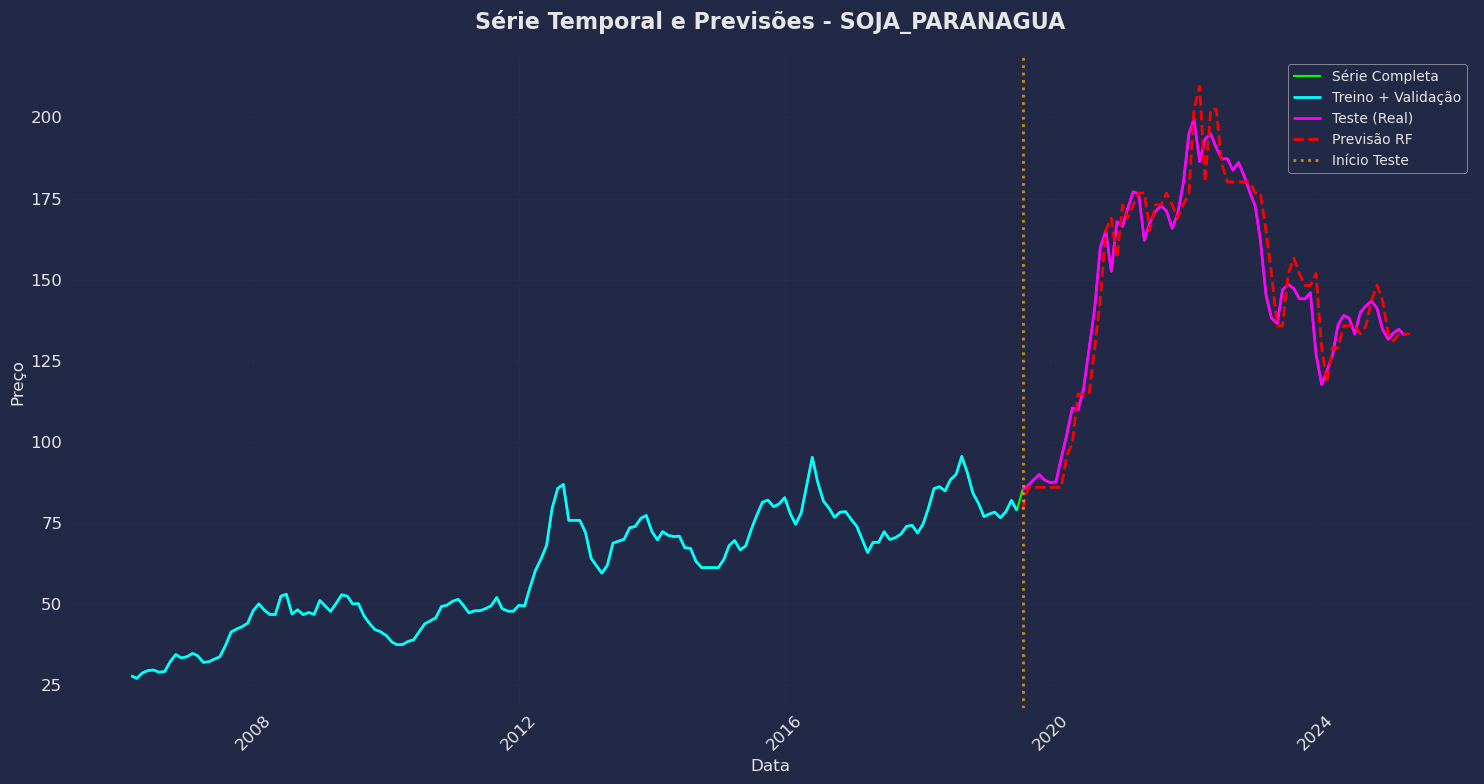

Gráfico exibido para: SOJA_PARANAGUA
--------------------------------------------------


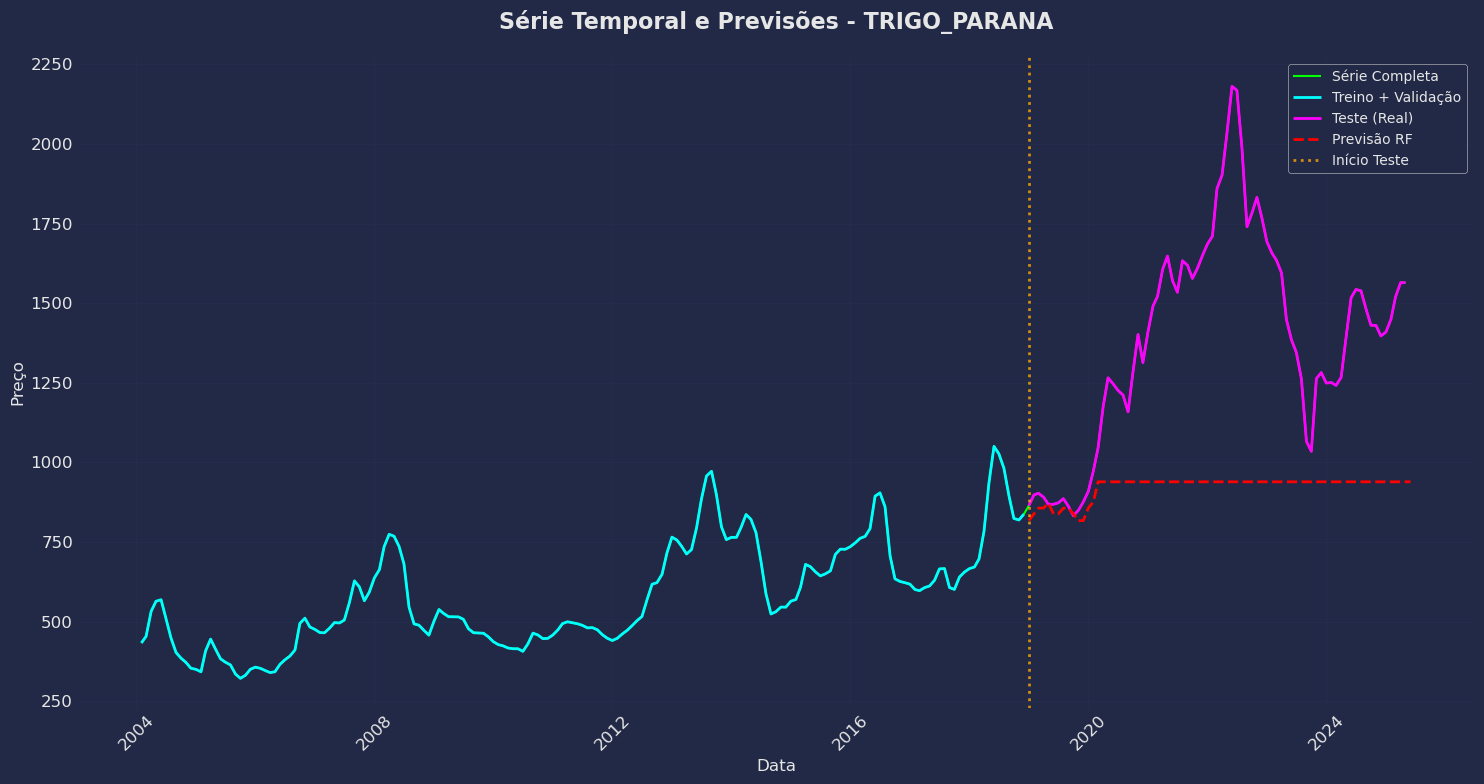

Gráfico exibido para: TRIGO_PARANA
--------------------------------------------------


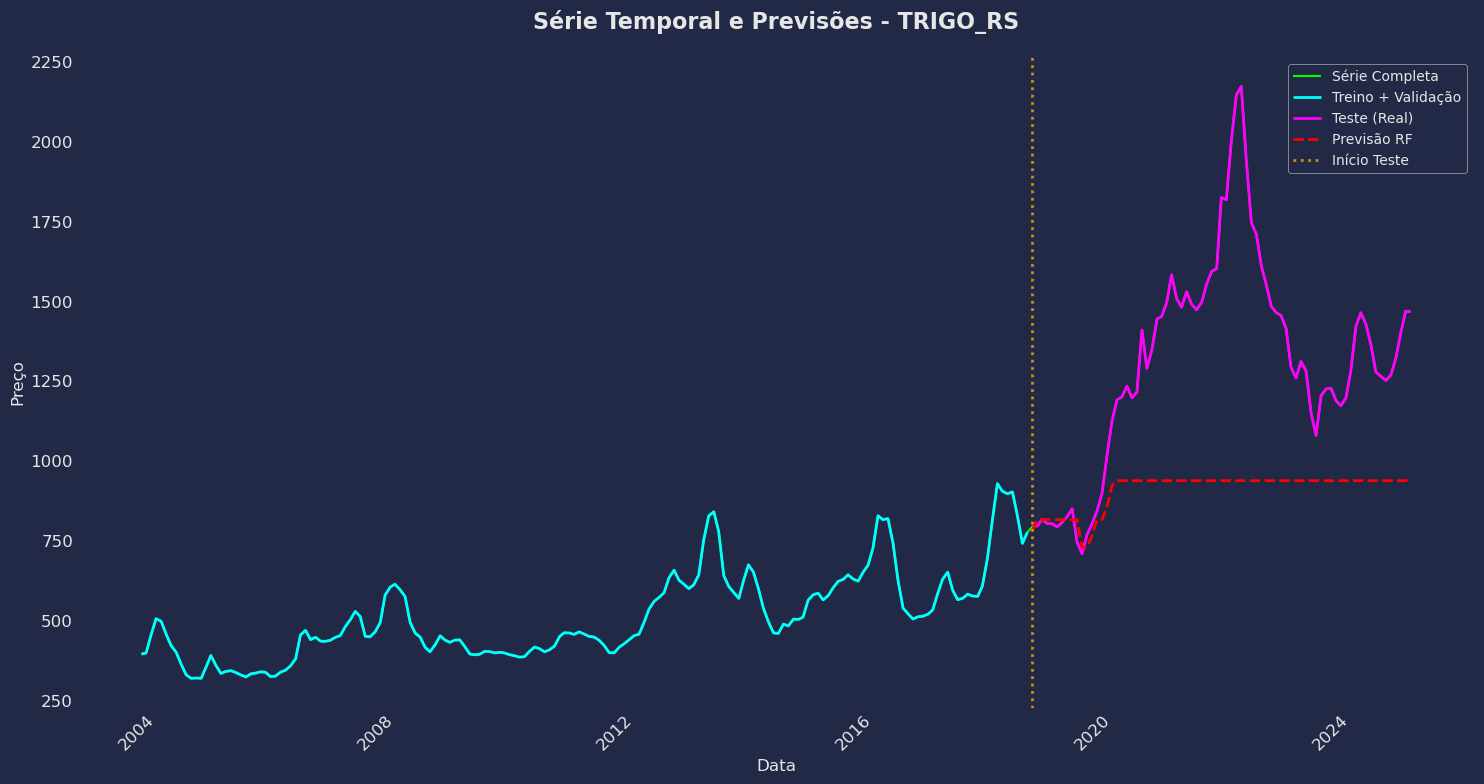

Gráfico exibido para: TRIGO_RS
--------------------------------------------------


In [33]:
def plot_series_and_forecasts(df_brl, full_train, test, forecasts_df):
    """
    Plota a série completa e as previsões para cada commodity individualmente
    """
    unique_ids = df_brl['unique_id'].unique()
    
    for uid in unique_ids:
        fig, ax = plt.subplots(1, 1, figsize=(15, 8))
        
        series_data = df_brl[df_brl['unique_id'] == uid].copy()
        train_data = full_train[full_train['unique_id'] == uid].copy()
        test_data = test[test['unique_id'] == uid].copy()
        forecast_data = forecasts_df[forecasts_df['unique_id'] == uid].copy()
        
        ax.plot(series_data['ds'], series_data['y'], 
                color='lime', linewidth=1.5, label='Série Completa')
        
        ax.plot(train_data['ds'], train_data['y'], 
                color='cyan', linewidth=2, label='Treino + Validação')
        
        ax.plot(test_data['ds'], test_data['y'], 
                color='fuchsia', linewidth=2, label='Teste (Real)')
        
        ax.plot(forecast_data['ds'], forecast_data['rf'], 
                color='red', linewidth=2, linestyle='--', label='Previsão RF')
        
        if len(test_data) > 0:
            ax.axvline(x=test_data['ds'].iloc[0], color='orange', 
                      linestyle=':', alpha=0.8, linewidth=2, label='Início Teste')
        
        ax.set_title(f'Série Temporal e Previsões - {uid}', 
                    fontsize=16, fontweight='bold', pad=20)
        ax.set_xlabel('Data', fontsize=12)
        ax.set_ylabel('Preço', fontsize=12)
        ax.legend(fontsize=10, loc='best')
        ax.grid(True, alpha=0.3)
        
        ax.tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        
        plt.show()
        
        print(f"Gráfico exibido para: {uid}")
        print("-" * 50)

plot_series_and_forecasts(df_brl, full_train, test, forecasts_df)